In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

A very, very quick attempt at K Nearest Neighbors, just to see how that treats us.

In [2]:
df = pd.read_csv('cleaned_datasets/creatures_transformed.csv', index_col=0)

In [ ]:
df.head()

In [ ]:
df.shape

For our initial attempts at training models to identify a creatures color via it's mana value, power, toughness and keywords, it seems better to reduce the dataset to only include mono-colored creatures.  Including every possible combination of multi-colored creature would require a lot more work, but is something to consider for the future.

In [ ]:
df.colors.unique()

In [3]:
df['numColors'] = df.colors.str.split(', ').str.len()

In [4]:
df = df.query('numColors == 1')

In [5]:
df.colors.unique()

array(['W', 'U', 'B', 'R', 'G', 'C'], dtype=object)

In [6]:
df.drop(columns=['numColors'], inplace=True)

In [ ]:
df.shape

#### Standardize the variables

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(df.drop(columns=['name', 'colors']))

MinMaxScaler()

In [10]:
scaled_features = scaler.transform(df.drop(columns=['name', 'colors']))

In [11]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[2:])

In [12]:
df_feat.head()

,manaValue,power,toughness,Adamant,Adapt,Afflict,Afterlife,Alliance,Amass,Ascend,...,Weird,Werewolf,Whale,Wizard,Wolf,Wolverine,Worm,Wurm,Yeti,Zombie
0,0.266667,0.230769,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.266667,0.153846,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.133333,0.230769,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.307692,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.133333,0.230769,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Train-Test-Split

In [13]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['colors'], test_size=0.05, random_state=101)

#### Gaussian Naive Bayes Classification

In [15]:
from sklearn.naive_bayes import GaussianNB

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [16]:
# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

In [ ]:
print(predicted)

In [ ]:
print(expected)

In [ ]:
print(predicted[0])

In [ ]:
results = pd.DataFrame(expected)

In [ ]:
results['predicted'] = predicted

In [ ]:
results.query('colors != predicted')

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test,predicted))
print('\n')
print(classification_report(y_test,predicted))

[[15 11  2 10  8 15]
 [ 0 22  0  0  0  0]
 [ 2 11 27 10  5 12]
 [ 1  8  0 36  3  7]
 [ 1  7  0  1 42 14]
 [ 0 13  0  2  0 40]]


              precision    recall  f1-score   support

           B       0.79      0.25      0.38        61
           C       0.31      1.00      0.47        22
           G       0.93      0.40      0.56        67
           R       0.61      0.65      0.63        55
           U       0.72      0.65      0.68        65
           W       0.45      0.73      0.56        55

    accuracy                           0.56       325
   macro avg       0.64      0.61      0.55       325
weighted avg       0.69      0.56      0.56       325



#### Choosing a K Value

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
len(df_feat)

3244

In [25]:
error_rate = []

for i in range(1, 60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

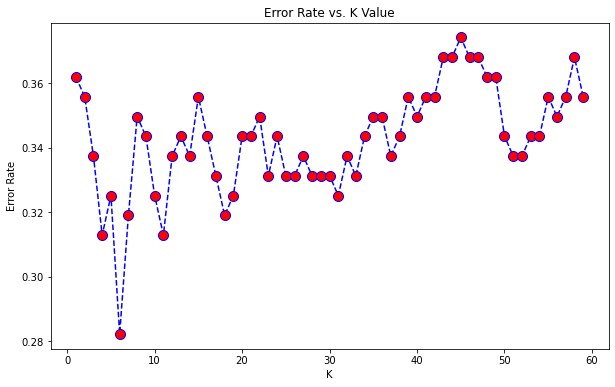

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
#K = 11
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=6


[[17  0  4  2  1  9]
 [ 1 10  0  0  0  0]
 [ 1  0 25  5  1  0]
 [ 1  0  1 20  2  1]
 [ 3  0  4  1 20  3]
 [ 1  0  0  3  2 25]]


              precision    recall  f1-score   support

           B       0.71      0.52      0.60        33
           C       1.00      0.91      0.95        11
           G       0.74      0.78      0.76        32
           R       0.65      0.80      0.71        25
           U       0.77      0.65      0.70        31
           W       0.66      0.81      0.72        31

    accuracy                           0.72       163
   macro avg       0.75      0.74      0.74       163
weighted avg       0.73      0.72      0.71       163



#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['colors'], test_size=0.05, random_state=101)

In [30]:
logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [31]:
predictions = logmodel.predict(X_test)

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.81      0.67      0.73        33
           C       1.00      0.91      0.95        11
           G       0.85      0.88      0.86        32
           R       0.67      0.80      0.73        25
           U       0.80      0.77      0.79        31
           W       0.79      0.84      0.81        31

    accuracy                           0.80       163
   macro avg       0.82      0.81      0.81       163
weighted avg       0.80      0.80      0.80       163



#### Decision Trees

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree = DecisionTreeClassifier()

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
tree_preds = dtree.predict(X_test)

In [37]:
print(classification_report(y_test,tree_preds))

              precision    recall  f1-score   support

           B       0.47      0.42      0.44        33
           C       1.00      0.82      0.90        11
           G       0.66      0.78      0.71        32
           R       0.52      0.56      0.54        25
           U       0.56      0.45      0.50        31
           W       0.62      0.68      0.65        31

    accuracy                           0.60       163
   macro avg       0.64      0.62      0.62       163
weighted avg       0.59      0.60      0.59       163



In [38]:
print(confusion_matrix(y_test,tree_preds))

[[14  0  4  3  4  8]
 [ 1  9  0  0  1  0]
 [ 1  0 25  5  1  0]
 [ 4  0  4 14  3  0]
 [ 9  0  2  1 14  5]
 [ 1  0  3  4  2 21]]


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [40]:
rfc_pred = rfc.predict(X_test)

In [41]:
print(confusion_matrix(y_test, rfc_pred))

[[17  0  3  2  5  6]
 [ 0 10  0  0  1  0]
 [ 0  0 23  7  1  1]
 [ 2  1  2 17  3  0]
 [ 4  0  3  1 20  3]
 [ 1  0  2  3  2 23]]


In [42]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           B       0.71      0.52      0.60        33
           C       0.91      0.91      0.91        11
           G       0.70      0.72      0.71        32
           R       0.57      0.68      0.62        25
           U       0.62      0.65      0.63        31
           W       0.70      0.74      0.72        31

    accuracy                           0.67       163
   macro avg       0.70      0.70      0.70       163
weighted avg       0.68      0.67      0.67       163

